In [1]:
cd /data/store01/data_dirs/students/ucfafyi/S2_MODIS

/data/store01/data_dirs/students/ucfafyi/S2_MODIS


In [2]:
import os
import sys
sys.path.insert(0,'python')
from PSF_optimization import *
from fastRWpkl import *
from get_wrs import *

In [3]:
lat, lon, year = 37.181944, 114.36, 2016

In [4]:
h,v = mtile_cal(lat, lon)
m = mgrs.MGRS()
mg_coor = m.toMGRS(lat, lon, MGRSPrecision=4)
place = mg_coor[:5]
fnames = []
directory  = os.getcwd()+'/s_data/%s/%s/%s/%d/'%(mg_coor[:2], mg_coor[2], mg_coor[3:5], year)
for path, subdirs, files in os.walk(directory):
    if 'B01.jp2' in files:
        fnames.append( os.path.join(path))

In [4]:
files = np.loadtxt('China_S2_images.txt', dtype='S10')

In [14]:
for i in files:
    pos, date = i
    da = datetime.datetime.strptime(date, '%Y-%m-%d')
    print pos+'_%02d%02d_PSF.pkl'%(da.month, da.day)

50SPG_1103_PSF.pkl
50SPG_1014_PSF.pkl
50SPG_1004_PSF.pkl
50SPG_0616_PSF.pkl
50SPG_0616_PSF.pkl
50SPG_0530_PSF.pkl
50SPG_0510_PSF.pkl
50SPG_0430_PSF.pkl
50SNG_0828_PSF.pkl
50SNG_0530_PSF.pkl
50SNG_0510_PSF.pkl
50SNG_0430_PSF.pkl
50SNG_0410_PSF.pkl
50SNG_0210_PSF.pkl
50SMG_1116_PSF.pkl
50SMG_0907_PSF.pkl
50SMG_0828_PSF.pkl
50SMG_0729_PSF.pkl
50SMG_0530_PSF.pkl
50SMG_0510_PSF.pkl
50SMG_0430_PSF.pkl
50SMG_0410_PSF.pkl
50SMG_0210_PSF.pkl
50SLG_1030_PSF.pkl
50SLG_0930_PSF.pkl
50SLG_0910_PSF.pkl
50SLG_0910_PSF.pkl
50SLG_0831_PSF.pkl
50SLG_0821_PSF.pkl
50SLG_0622_PSF.pkl
50SLG_0503_PSF.pkl
50SLG_0413_PSF.pkl
50SLG_0203_PSF.pkl
50SLG_0403_PSF.pkl
50SLG_0114_PSF.pkl
50SKG_1030_PSF.pkl
50SKG_1010_PSF.pkl
50SKG_0930_PSF.pkl
50SKG_0910_PSF.pkl
50SKG_0831_PSF.pkl
50SKG_0821_PSF.pkl
50SKG_0821_PSF.pkl
50SKG_0811_PSF.pkl
50SKG_0622_PSF.pkl
50SKG_0503_PSF.pkl
50SKG_0413_PSF.pkl
50SKG_0203_PSF.pkl
50SNH_1116_PSF.pkl
50SNH_1017_PSF.pkl
50SNH_0828_PSF.pkl
50SNH_0510_PSF.pkl
50SNH_0430_PSF.pkl
50SNH_0410_P

In [17]:
m = mgrs.MGRS()
m.toLatLon(pos)

(37.040893542510126, 118.12448022993999)

In [19]:
pos

'50SPG'

In [20]:
m = mgrs.MGRS()
m.toMGRS(37.040893542510126, 118.12448022993999, MGRSPrecision=5)

'50SPF0000099999'

In [ ]:
for fi in files:
    pos, date = fi
    print pos
    da = datetime.datetime.strptime(date, '%Y-%m-%d')
    doy = datetime .datetime(da.year, da.month, da.day).timetuple().tm_yday
    lat, lon = m.toLatLon(pos)
    if da.month<=10:
        C = PSF_optimization(da.year, da.month, da.day, doy, lat+0.5, lon+1, 'S2')
        data = C.S2_PSF_optimization()
        try:
            parallel_rw_pkl(data, pos+'_%02d%02d_PSF.pkl'%(da.month, da.day))
        except:
            print 'something wrong', fi
    else:
        print 'Due to lack of modis', fi

50SPG
Due to lack of modis ['50SPG' '2016-11-03']
50SPG

Here is the cloud probability calculation!

/S/PG/2016/10/14/0/ (2, 3, 4, 8, 11, 12, 13)
7%


python/classification.py:122: RuntimeWarning: invalid value encountered in divide
  self.NDSI = (self.b3 - self.eb11)/(self.eb11 + self.b3)
python/classification.py:93: RuntimeWarning: invalid value encountered in greater
  m = ca > minm


14%
21%
29%
36%


python/classification.py:149: RuntimeWarning: divide by zero encountered in divide
  b2_b4 = self.b2/self.b4
python/classification.py:149: RuntimeWarning: invalid value encountered in divide
  b2_b4 = self.b2/self.b4


43%


python/classification.py:178: RuntimeWarning: invalid value encountered in greater
  S_p_m = self.sp > self.t7_sp #use the finnal possibility to thershold (0.73 for his) the snow mask


50%


python/classification.py:183: RuntimeWarning: invalid value encountered in divide
  self.NDVI = (self.b8 - self.b4)/(self.b8 + self.b4)
python/classification.py:99: RuntimeWarning: invalid value encountered in less
  m = ca < maxm


57%


python/classification.py:190: RuntimeWarning: divide by zero encountered in divide
  b8_b3 = self.b8/self.b3
python/classification.py:190: RuntimeWarning: invalid value encountered in divide
  b8_b3 = self.b8/self.b3


64%


python/classification.py:197: RuntimeWarning: divide by zero encountered in divide
  b2_b11 = self.b2/self.eb11
python/classification.py:197: RuntimeWarning: invalid value encountered in divide
  b2_b11 = self.b2/self.eb11
python/classification.py:201: RuntimeWarning: invalid value encountered in less
  self.bsm = (self.b2 < b2_FT) & (b2_b11 < 0.6) #bare soil
python/classification.py:203: RuntimeWarning: invalid value encountered in less
  self.p10m = p10m & ~(self.b2 < b2_FT)


71%
79%


python/classification.py:216: RuntimeWarning: divide by zero encountered in divide
  b2_b11 = self.b2/self.eb11
python/classification.py:216: RuntimeWarning: invalid value encountered in divide
  b2_b11 = self.b2/self.eb11
python/classification.py:218: RuntimeWarning: invalid value encountered in greater
  self.wm2 = where((b2_b11 > 4.) & (self.eb12 < B12_FT) & (self.eb8a < self.b4) & (self.b2 < 0.2), True, False)
python/classification.py:218: RuntimeWarning: invalid value encountered in less
  self.wm2 = where((b2_b11 > 4.) & (self.eb12 < B12_FT) & (self.eb8a < self.b4) & (self.b2 < 0.2), True, False)
python/classification.py:219: RuntimeWarning: invalid value encountered in less
  R15_AMB = (b2_b11 < 4.) & (b2_b11 >= 2.) & (self.eb12 < B12_FT) & (self.eb8a < self.b4) & (self.b2 < 0.2)
python/classification.py:219: RuntimeWarning: invalid value encountered in greater_equal
  R15_AMB = (b2_b11 < 4.) & (b2_b11 >= 2.) & (self.eb12 < B12_FT) & (self.eb8a < self.b4) & (self.b2 < 0.2)


86%


python/classification.py:228: RuntimeWarning: divide by zero encountered in divide
  b8a_b11 = self.eb8a/self.eb11
python/classification.py:228: RuntimeWarning: invalid value encountered in divide
  b8a_b11 = self.eb8a/self.eb11
python/classification.py:230: RuntimeWarning: invalid value encountered in less
  self.Dssm = (self.b2 < b2_FT) & (b8a_b11 < 0.9) & (self.b2 < 0.8)
python/classification.py:232: RuntimeWarning: invalid value encountered in less
  self.p13m = p13m & ~(self.b2 < b2_FT)


93%


python/classification.py:237: RuntimeWarning: divide by zero encountered in divide
  b4_b11 = self.b4/self.eb11
python/classification.py:237: RuntimeWarning: invalid value encountered in divide
  b4_b11 = self.b4/self.eb11


99%


python/classification.py:286: RuntimeWarning: invalid value encountered in greater
  c_ptm = self.cp > self.c_pt


Done!!!


python/PSF_optimization.py:114: RuntimeWarning: divide by zero encountered in divide
  dif_mask = (dif/np.abs(forward_8_days[i,0,:])) <thresh
python/PSF_optimization.py:114: RuntimeWarning: invalid value encountered in divide
  dif_mask = (dif/np.abs(forward_8_days[i,0,:])) <thresh
python/PSF_optimization.py:114: RuntimeWarning: invalid value encountered in less
  dif_mask = (dif/np.abs(forward_8_days[i,0,:])) <thresh


Optimization terminated successfully.
         Current function value: 0.050309
         Iterations: 20
         Function evaluations: 68
Optimization terminated successfully.
         Current function value: 0.049820
         Iterations: 21
         Function evaluations: 67
Optimization terminated successfully.
         Current function value: 0.049307
         Iterations: 21
         Function evaluations: 69
Optimization terminated successfully.
         Current function value: 0.048017
         Iterations: 19
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.046274
         Iterations: 17
         Function evaluations: 60
Optimization terminated successfully.
         Current function value: 0.041916
         Iterations: 45
         Function evaluations: 170
Optimization terminated successfully.
         Current function value: 0.039801
         Iterations: 14
         Function evaluations: 53
Optimization terminated successfu

In [ ]:
'''
for fname in fnames[6:]:
    month, day =  int(fname.split('/')[-3]), int(fname.split('/')[-2])
    doy = datetime .datetime(year, month, day).timetuple().tm_yday
    C = PSF_optimization(2016, month, day, doy, 37.181944, 114.36, 'S2')
    data = C.S2_PSF_optimization()
    try:
        parallel_rw_pkl(data, mg_coor[:5]+'_%02d%02d_PSF.pkl'%(month, day))
    except:
        pass

In [28]:
ls pkls/50SKG*PSF*

pkls/50SKG_0117_PSF.pkl00.pkl  pkls/50SKG_0526_PSF.pkl00.pkl
pkls/50SKG_0117_PSF.pkl01.pkl  pkls/50SKG_0526_PSF.pkl01.pkl
pkls/50SKG_0117_PSF.pkl02.pkl  pkls/50SKG_0526_PSF.pkl02.pkl
pkls/50SKG_0117_PSF.pkl03.pkl  pkls/50SKG_0526_PSF.pkl03.pkl
pkls/50SKG_0124_PSF.pkl00.pkl  pkls/50SKG_0612_PSF.pkl00.pkl
pkls/50SKG_0124_PSF.pkl01.pkl  pkls/50SKG_0612_PSF.pkl01.pkl
pkls/50SKG_0124_PSF.pkl02.pkl  pkls/50SKG_0612_PSF.pkl02.pkl
pkls/50SKG_0124_PSF.pkl03.pkl  pkls/50SKG_0612_PSF.pkl03.pkl
pkls/50SKG_0203_PSF.pkl00.pkl  pkls/50SKG_0615_PSF.pkl00.pkl
pkls/50SKG_0203_PSF.pkl01.pkl  pkls/50SKG_0615_PSF.pkl01.pkl
pkls/50SKG_0203_PSF.pkl02.pkl  pkls/50SKG_0615_PSF.pkl02.pkl
pkls/50SKG_0203_PSF.pkl03.pkl  pkls/50SKG_0615_PSF.pkl03.pkl
pkls/50SKG_0216_PSF.pkl00.pkl  pkls/50SKG_0622_PSF.pkl00.pkl
pkls/50SKG_0216_PSF.pkl01.pkl  pkls/50SKG_0622_PSF.pkl01.pkl
pkls/50SKG_0216_PSF.pkl02.pkl  pkls/50SKG_0622_PSF.pkl02.pkl
pkls/50SKG_0216_PSF.pkl03.pkl  pkls/50SKG_0622_PSF.pkl03.pkl
pkls/50SKG_0413_PSF.pkl0

In [7]:
S2_0503 = parallel_rw_pkl(None, mg_coor[:5]+'_0503_PSF.pkl','r')

In [12]:
S2_0503_para = np.array([i[0] for i in S2_0503[0]])
S2_0503_cost = np.array([i[1] for i in S2_0503[0]])

In [38]:
S2_0503_para,S2_0503_cost, S2_0503_para[S2_0503_cost==S2_0503_cost.min()]

(array([[ 32.2021052 ,  39.26454563,  10.48347826,  26.14453125,   1.03125   ],
        [ 32.08891216,  38.56787714,  13.67241732,  26.14453125,   1.03125   ],
        [ 30.6970037 ,  41.16659343,   4.77731869,  26.14453125,   1.03125   ],
        [ 30.56770754,  41.33895097,   7.50401674,  26.14453125,   1.03125   ],
        [ 30.63526707,  42.43958329,  10.39015363,  26.14453125,   1.03125   ],
        [ 30.39449802,  42.49946213,   8.14683622,  26.14453125,   1.03125   ],
        [ 33.88291446,  38.0326361 ,  14.73609727,  26.14453125,   1.03125   ],
        [ 32.08891216,  38.56787714,  13.67241732,  26.14453125,   1.03125   ],
        [ 32.56509596,  38.50969459,  12.60858224,  26.14453125,   1.03125   ],
        [ 33.04411709,  38.94580943,  11.59462941,  26.14453125,   1.03125   ],
        [ 31.83672494,  39.18529072,   1.84497446,  26.14453125,   1.03125   ],
        [ 33.18344875,  38.58607834,  12.00510412,  26.14453125,   1.03125   ],
        [ 32.08891216,  38.56787714,  13

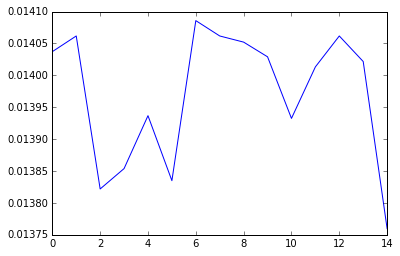

In [16]:
import pylab as plt
%matplotlib inline
plt.plot(S2_0503_cost)

In [9]:
S2_0513 = parallel_rw_pkl(None, mg_coor[:5]+'_0513_PSF.pkl','r')

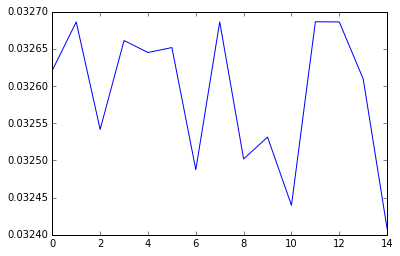

In [17]:
S2_0513_para = np.array([i[0] for i in S2_0513[0]])
S2_0513_cost = np.array([i[1] for i in S2_0513[0]])
plt.plot(S2_0513_cost)

In [37]:
S2_0513_para, S2_0513_cost, S2_0513_para[S2_0513_cost==S2_0513_cost.min()]

(array([[ 33.33898498,  37.89907813,  13.76255419,  23.90625   ,   6.375     ],
        [ 36.42301501,  37.17725242,  14.90403862,  23.90625   ,   6.375     ],
        [ 33.18823642,  38.83326757,   4.59289675,  23.90625   ,   6.375     ],
        [ 36.45299417,  37.89584219,  10.63102923,  23.90625   ,   6.375     ],
        [ 37.9263378 ,  35.0588645 ,  15.        ,  23.90625   ,   6.375     ],
        [ 36.58084975,  37.78755892,  11.05434111,  23.90625   ,   6.375     ],
        [ 31.90260704,  40.71647604,  -1.16991505,  23.90625   ,   6.375     ],
        [ 36.42301501,  37.17725242,  14.90403862,  23.90625   ,   6.375     ],
        [ 29.73753371,  39.61035154,  -3.10139036,  23.90625   ,   6.375     ],
        [ 31.44031711,  39.47944514,   2.2829622 ,  23.90625   ,   6.375     ],
        [ 30.40268327,  41.91071005,  -7.38226353,  23.90625   ,   6.375     ],
        [ 35.74297041,  37.17842175,  15.        ,  23.90625   ,   6.375     ],
        [ 36.42301501,  37.17725242,  14

In [33]:
S2_0612 = parallel_rw_pkl(None, '50SKG_0612_PSF.pkl', 'r')

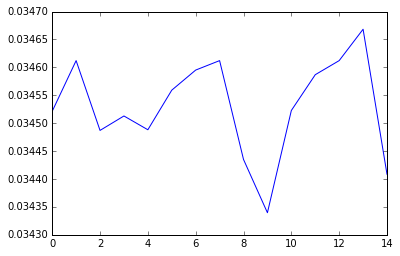

In [34]:
S2_0612_para = np.array([i[0] for i in S2_0612[0]])
S2_0612_cost = np.array([i[1] for i in S2_0612[0]])
plt.plot(S2_0612_cost)

In [36]:
S2_0612_para, S2_0612_cost, S2_0612_para[S2_0612_cost==S2_0612_cost.min()]

(array([[ 41.02389838,  49.32087076,  -7.96033326,  22.546875  ,   3.375     ],
        [ 43.11979168,  49.06393218,   8.83488828,  22.546875  ,   3.375     ],
        [ 42.72799356,  50.26332216,   5.3071354 ,  22.546875  ,   3.375     ],
        [ 42.41012056,  49.79019674,   4.81942944,  22.546875  ,   3.375     ],
        [ 45.59089379,  50.55378415,  12.63118706,  22.546875  ,   3.375     ],
        [ 45.44764844,  49.51081492,   5.24895853,  22.546875  ,   3.375     ],
        [ 43.84283468,  48.97551587,  14.72742238,  22.546875  ,   3.375     ],
        [ 43.11979168,  49.06393218,   8.83488828,  22.546875  ,   3.375     ],
        [ 42.42000936,  51.09843619,   5.67132279,  22.546875  ,   3.375     ],
        [ 40.60997547,  52.28300757,  11.75248593,  22.546875  ,   3.375     ],
        [ 41.42459956,  49.2950427 ,  -2.52344707,  22.546875  ,   3.375     ],
        [ 41.10304153,  48.67337005,  10.71430985,  22.546875  ,   3.375     ],
        [ 43.11979168,  49.06393218,   8